In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import numpy as np

In [2]:

def detect_outliers_iqr(data):
    # Compute the first and third quartiles
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound


def plot_boxplot_by_treatment(d, x_val, y_val, order, pairs, palette, ylim):
    # Draw the boxplot with a semi-transparent fill (alpha=0.5) applied via boxprops.
    ax = sns.boxplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        palette=palette, 
        order=order, 
        width=0.4, 
       # capsize=0.1, 
        linewidth=1,

        showfliers=False
    )

    ax.set_ylim(0,ylim)
    ax.set_xlim(-0.5, len(order)+5)
    # Overlay the stripplot
    sp = sns.stripplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        dodge=False, 
        jitter=0.1, 
        alpha=1,  
        order=order, 
        color='black',
        #palette=palette,
        size=3
    )

    #plt.ylim(0, plt.ylim()[1])
    # Shift the stripplot points slightly to the left.
    shift = 0.4  # Adjust this value as needed
    for i, coll in enumerate(sp.collections):
        # if i == 0:
        #     shift = 0.4
        # elif i == 1:
        #     shift = 0.4
        # elif i == 2:
        #     shift = 0.4
            
        offsets = coll.get_offsets()
        # Subtract from the x-coordinate to move left
        offsets[:, 0] = offsets[:, 0] + shift
        coll.set_offsets(offsets)
    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=d, x=x_val, y=y_val, order=order)
    annotator.configure(test='t-test_ind', text_format='full', loc='outside',
                        verbose=2, show_test_name=False, line_offset_to_group=8,  # Increases space between the brackets and the plot
    text_offset=2)
    annotator.apply_and_annotate()

    plt.xticks(rotation=0)
    plt.xlabel('')

    # Adjust the boxes so that the face remains semi-transparent while the edge is opaque.
    # Try iterating over both ax.artists and ax.patches.
    for patch in ax.patches:
        # Get the current facecolor (an RGBA tuple)
        fc = patch.get_facecolor()
        # Set the facecolor to have your desired alpha (e.g., 0.5)
        patch.set_facecolor((fc[0], fc[1], fc[2], 0.5))
        # Set the edgecolor to the same RGB but fully opaque (alpha=1)
        #patch.set_edgecolor((fc[0], fc[1], fc[2], 1.0))
        patch.set_linewidth(1)

    return ax


#plt.savefig('../../paper/main_plots/tmrm_choline_boxplot.png', dpi=300, bbox_inches='tight')


In [36]:
#### Plot without outliers and zero cells removed

import pandas as pd

# Load data from the Excel file
file_path = '../../activity_data/2 week data_jan recordings .xlsx'
data = pd.read_excel(file_path, sheet_name=0, header=None)


,0,1,2,3,4,5
26,E3_1_1.czi,7,7,7,NaN,7
27,E3_2_1.czi,2,2,2,NaN,2
28,E3_3_1.czi,4,4,4,NaN,4
29,E3_4_1.czi,8,3,3,NaN,4.666667
30,E3_5_1.czi,3,3,3,NaN,3
31,G2_1_1.czi,7,7,7,NaN,7
32,G2_2_1.czi,10,11,11,NaN,10.666667
33,G2_3_1.czi,10,10,10,NaN,10
34,G2_4_1.czi,13,11,13,NaN,12.333333
35,G2_5_1.czi,11,11,12,NaN,11.333333


In [55]:
df = data.loc[1:20]
df.columns = data.iloc[0]
df2 = data.iloc[26:46]
df2.columns = data.iloc[0]
df = pd.concat([df, df2], axis=0)
df.reset_index(drop=True, inplace=True)
df['events/min'] = df['events/min'].astype(float)
df['grp'] = [x.split('_')[0] for x in df.iloc[:,0]]


In [56]:
df = df[df['grp'] != 'G2']

E3 vs. Y622: t-test independent samples, P_val:2.625e-04 t=-4.524e+00
Y622 vs. Y622C: t-test independent samples, P_val:1.356e-01 t=1.562e+00


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


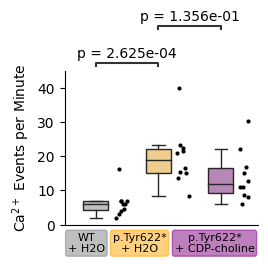

In [60]:
fig, (ax1) = plt.subplots(1, 1, figsize=(2.5, 2))

plt.sca(ax1)

ax1 = plot_boxplot_by_treatment(df, 'grp', 'events/min', order = ['E3', 'Y622', 'Y622C'], pairs = [('E3', 'Y622'), ('Y622', 'Y622C')],palette={'E3': 'grey', 'Y622': 'orange', 'Y622C': 'purple'}, 
                                ylim = np.max(df['events/min']+5) )

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Ca$^{2+}$ Events per Minute')

ax1.text(-0.15, -0.05, "WT\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(0.7, -0.05, "p.Tyr622*\n+ H2O", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
ax1.text(1.9, -0.05, "p.Tyr622*\n+ CDP-choline", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="purple", ec="purple", alpha=0.5), fontsize=8)


#plt.subplots_adjust(left=0.07, right=0.9, top=0.8, bottom=0.08, wspace=0.4)
ax1.set_xlim(-0.5,2.6)
plt.savefig('../../paper/extended_plots/calcium_data.png', dpi=300, bbox_inches='tight')

In [98]:
#### Plot without outliers and zero cells removed

import pandas as pd

# Load data from the Excel file
file_path = '../../activity_data/2 week data_jan recordings .xlsx'
data = pd.read_excel(file_path, sheet_name=1, header=None)

df = data.iloc[3:]
df.columns = data.iloc[0]

In [101]:
df.head()

,E3_1_1.czi,[sec],Mean,NaN,NaN,G2_5_1.czi,Mean,NaN,NaN,Y622_2_1.czi,Mean,NaN,NaN,Y622C_2_1.czi,Mean,NaN
3,NaN,1.865,5.1275,55.1275,54.2968,55.7968,13.6864,43.6864,43.2405,NaN,17.4513,32.4513,26.0633,NaN,22.2819,14.7512
4,NaN,2.798,4.8977,54.8977,54.3128,55.8128,13.5781,43.5781,43.5555,NaN,21.8748,36.8748,25.0044,NaN,23.3219,14.9306
5,NaN,3.731,4.7234,54.7234,54.2998,55.7998,13.7157,43.7157,44.0866,NaN,24.4282,39.4282,24.9361,NaN,19.6904,14.5995
6,NaN,4.664,4.6194,54.6194,54.3402,55.8402,13.8642,43.8642,44.9589,NaN,18.5499,33.5499,29.7996,NaN,17.8223,14.2790
7,NaN,5.596,4.545,54.5450,59.0124,60.5124,14.7712,44.7712,52.6011,NaN,17.1595,32.1595,41.1950,NaN,16.212,14.3177


In [102]:
df.columns = ['E3', 'time', 'mean', 'v1', 'value', 'G2', 'mean', 'v1', 'value', 'Y', 'mean', 'v1', 'value', 'Y+C', 'mean', 'value']
df.head()

,E3,time,mean,v1,value,G2,mean,v1,value,Y,mean,v1,value,Y+C,mean,value
3,NaN,1.865,5.1275,55.1275,54.2968,55.7968,13.6864,43.6864,43.2405,NaN,17.4513,32.4513,26.0633,NaN,22.2819,14.7512
4,NaN,2.798,4.8977,54.8977,54.3128,55.8128,13.5781,43.5781,43.5555,NaN,21.8748,36.8748,25.0044,NaN,23.3219,14.9306
5,NaN,3.731,4.7234,54.7234,54.2998,55.7998,13.7157,43.7157,44.0866,NaN,24.4282,39.4282,24.9361,NaN,19.6904,14.5995
6,NaN,4.664,4.6194,54.6194,54.3402,55.8402,13.8642,43.8642,44.9589,NaN,18.5499,33.5499,29.7996,NaN,17.8223,14.2790
7,NaN,5.596,4.545,54.5450,59.0124,60.5124,14.7712,44.7712,52.6011,NaN,17.1595,32.1595,41.1950,NaN,16.212,14.3177


In [103]:

df_sub = df[['value']]
df_sub.columns = ['E3', 'G2', 'Y', 'Y+C']
df_sub = df_sub[['E3', 'Y', 'Y+C']]
df_sub['time'] = df[['time']].values.reshape(-1)


/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/djuna/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

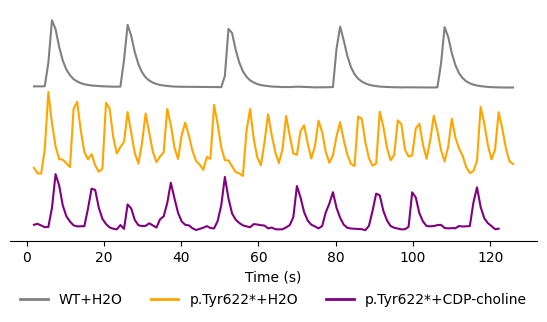

In [132]:
plt.figure(figsize=(6.8, 3))
sns.lineplot(data=df_sub, x='time', y=df_sub['E3']-12, color='grey')
# Remove y-axis
ax = plt.gca()
ax.yaxis.set_visible(False)

# Remove top, left, and right plot borders
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.lineplot(data=df_sub, x='time', y='Y', color='orange')
sns.lineplot(data=df_sub, x='time', y='Y+C', color='purple')
# Add color legend
import matplotlib.pyplot as plt

# Create a custom legend
legend_labels = ['WT+H2O', 'p.Tyr622*+H2O', 'p.Tyr622*+CDP-choline']
legend_colors = ['grey', 'orange', 'purple']
handles = [plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors]
plt.legend(handles, legend_labels, loc='upper right')

# Move the legend outside the plot
plt.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), frameon=False, ncol=3)

plt.xlabel('Time (s)')

plt.savefig('../../paper/extended_plots/calcium_traces.png', dpi=300, bbox_inches='tight')